In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from autils import *
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

In [8]:
X, y = load_data()
print(X.shape, y.shape)

(1000, 400) (1000, 1)


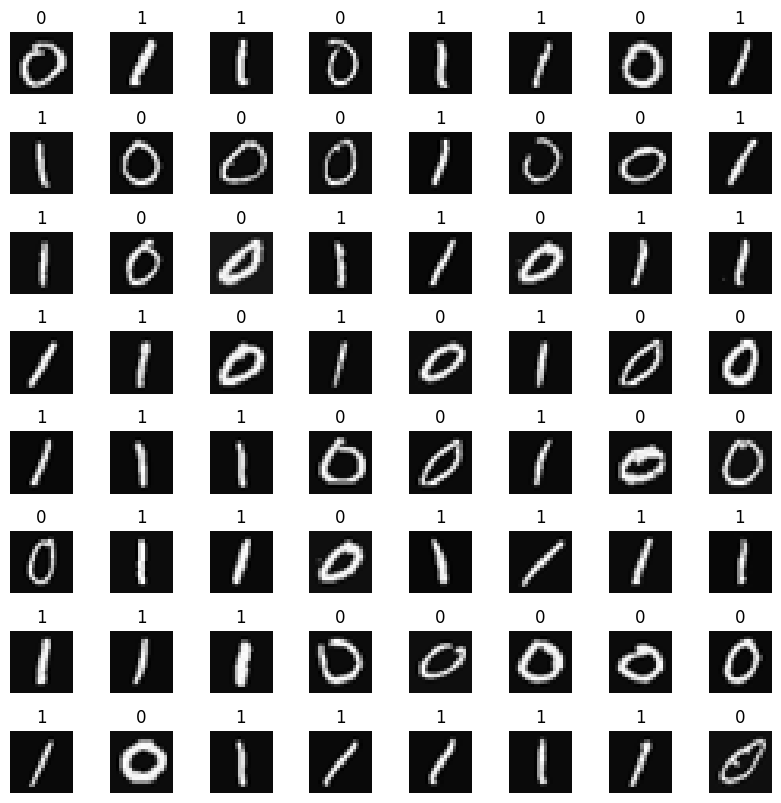

In [9]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i, ax in enumerate(axes.flat):
    # select random indices
    random_index = np.random.randint(m)

    # select rows corresponding to the random indices and reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # display the image
    ax.imshow(X_random_reshaped, cmap="gray")

    # display the label above the image
    ax.set_title(y[random_index, 0])
    ax.set_axis_off()

In [ ]:
model = Sequential(
    [
        tf.keras.Input(shape=(400,)),
        tf.keras.layers.Dense(25, activation="sigmoid"),
        tf.keras.layers.Dense(15, activation="sigmoid"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ], name = "digit_model"
)